# Round Trip Tearsheet

When evaluating the performance of an investing strategy, it is helpful to quantify the frequency, duration, and profitability of its independent bets, or "round trip" trades. A round trip trade is started when a new long or short position is opened and is only completed when the number of shares in that position returns to or crosses zero. 

The intent of the round trip tearsheet is to help differentiate strategies that profited off a few lucky trades from strategies that profited repeatedly from genuine alpha. Breaking down round trip profitability by traded name and sector can also help inform universe selection and identify exposure risks. For example, even if your equity curve looks robust, if only two securities in your universe of fifteen names contributed to overall profitability, you may have reason to question the logic of your strategy.

To identify round trips, pyfolio groups transactions by symbol and identifies the points at which each position amount leaves and returns to zero. Behind the scenes, transactions that cause position amounts to flip directly from long to short or short to long are divided into separate transactions so that distinct round trips can be identified. In calculating round trips, pyfolio will also append position closing transactions at the last timestamp in the positions data. This closing transaction will cause the PnL from any open positions to realized as completed round trips.

**Note: The round trip method of quantifying performance is not applicable to every style of strategy.** For instance, simple rebalancing algorithms make very few, if any, round trip trades. The results of the round trip tearsheet will be less informative for any strategy that doesn't entirely exit positions.

In [1]:
%matplotlib inline
import gzip
import os
import pandas as pd
import pyfolio as pf

In [2]:
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=0)
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=0)
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                    index_col=0, parse_dates=0)

In [3]:
# Optional: Sector mappings may be passed in as a dict or pd.Series. If a mapping is
# provided, PnL from symbols with mappings will be summed to display profitability by sector.
sect_map = {'COST': 'Consumer Goods', 'INTC':'Technology', 'CERN':'Healthcare', 'GPS':'Technology',
            'MMM': 'Construction', 'DELL': 'Technology', 'AMD':'Technology'}

                      duration           pnl      returns       long
count                     1430   1430.000000  1430.000000       1430
mean    9 days 16:40:56.154545     45.737238     0.003543  0.5230769
std    22 days 02:16:41.165898   1616.537844     0.031288  0.4996419
min            0 days 00:00:00 -30697.460000    -0.218045      False
25%            0 days 23:59:59     -5.773144    -0.011450          0
50%            2 days 23:59:59      0.871629     0.003885          1
75%            5 days 23:59:59     40.438366     0.018126          1
max          286 days 00:00:00  17835.869482     0.204385       True
Percent of round trips profitable = 57.2%
Mean return per winning round trip = 0.02181
Mean return per losing round trip = -0.02108
A decision is made every 1.053 days.
0.9495 trading decisions per day.
19.94 trading decisions per month.

Profitability (PnL / PnL total) per name:
symbol
COST    0.398964
INTC    0.382659
CERN    0.323077
MMM     0.221479
GPS     0.049385
AMD   

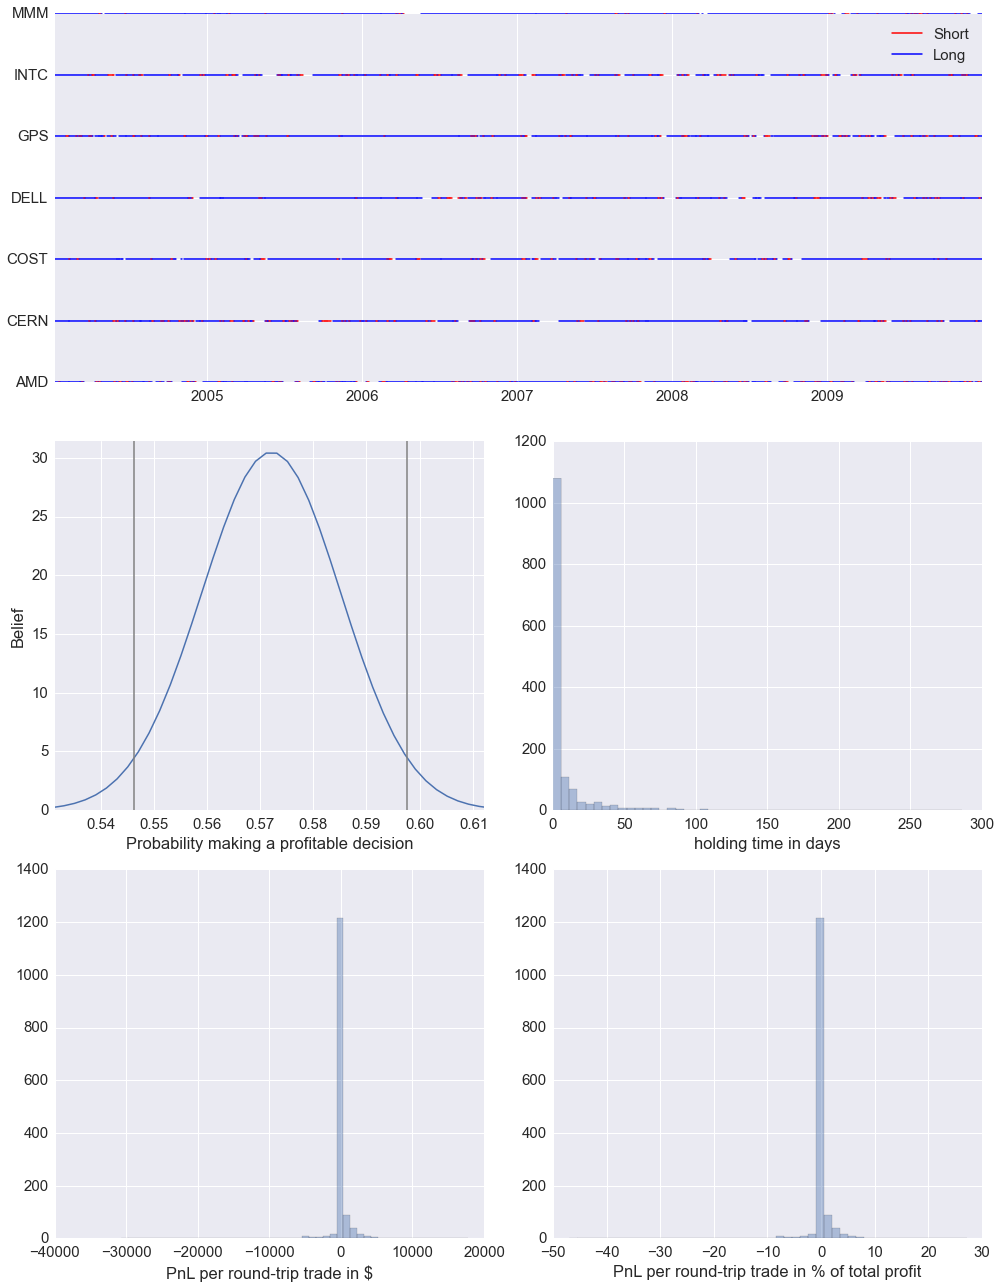

In [4]:
pf.tears.create_round_trip_tear_sheet(transactions, positions, sector_mappings=sect_map)